# Keras

## 【事前準備】

In [1]:
# scikit-learnの「set_config(display="diagram")」を使用するため、scikitlearnを最新verに更新
# !pip install scikit-learn==0.23.2 --target drive/My\ Drive/MyModule
# !pip install scikit-learn==0.23.2
# !pip install tensorflow==1.14
!pip list
## Google Drive上にインストールしたモジュールのインポート##
import sys
sys.path.append('/content/drive/My Drive/MyModule')

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
alembic                      1.10.4
altair                       5.3.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       6.0.0
blinker                      1.8.2
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.0.1
click                        8.1.3
cmaes                        0.9.1
colorama                     0.4.6
colorlog                     6.7.0
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
## モジュールのインポート ##
# 一般
import random
import math
# データ分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
# 決定木可視化のためのツール
# import graphviz
# import pydotplus
from IPython.display import Image
# from sklearn.externals.six import StringIO
# TensorFlow
import tensorflow as tf   # tensorflow1系
# tf.enable_eager_execution()   # tensorflow1系
# import tensorflow.compat.v1 as tf   # tensorflow2系
# tf.disable_eager_execution()   # tensorflow2系

# Keras
from keras.datasets import mnist  # メモ: TensorFlow ver1.14をインストール時はkerasは使用不可
# その他
# from google.colab import drive #GoogleDriveモジュール
# drive.mount('/content/drive') #GoogleDriveのマウント

深層学習フレームワークには公式にさまざまなモデルのExampleコードが公開されています。


## 【問題1】公式チュートリアルモデルを分担して実行
TensorFLowの公式チュートリアルモデルを分担して実行してください。


以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。


models/tutorials at master · tensorflow/models

### 【問題1 解答】
公式チュートリアルのモデルの内、以下３つについて実際にColaboratory上で実行して調査した。
- 初心者のための TensorFlow 2.0 入門(https://www.tensorflow.org/tutorials/quickstart/beginner)
 - MNISTデータセットを用いた分類モデルの実装例が記載されている。
 - Sequential APIを用いたモデル定義の方法について説明。MNISTのように特徴量が複数の次元で定義されているような場合は、Flattenレイヤを最初に差し込むことで平滑化している。
 ```
 model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
 ```
 - 損失関数の定義：　下記のようにSparseCategoricalCrossentropyクラスをインスタンス化し、そのコールメソッドを用いて損失の算出に直接使用したり、コンパイルの引数に渡してやることでfit時に自動的に算出されるようにしたりしている。
```
 loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
 loss_fn(y_train[:1], predictions).numpy()  # 出力: 2.835742
 model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
 model.fit(x_train, y_train, epochs=5)
 >>>Epoch 1/5
>>>1875/1875 [==============================] - 5s 2ms/step - loss: 0.2974 - accuracy: 0.9136
>>>Epoch 2/5
>>>1875/1875 [==============================] - 4s 2ms/step - loss: 0.1441 - accuracy: 0.9579
```
 - Sequentialモデルをさらに別のsequentialモデルでラップする例も記載されている。（下記は順伝播処理の出力層にSoftmaxレイヤを追加する例）
 ```
 probability_model = tf.keras.Sequential([
              model,
              tf.keras.layers.Softmax()
])
probability_model(x_test[:5])
>>><tf.Tensor: shape=(5, 10), dtype=float32, numpy=
>>>array([[2.8762310e-07, 1.7892530e-08, 7.0764213e-07, 3.2105378e-05,
>>>        9.0844152e-11, 4.1258826e-08, 3.4897377e-11, 9.9996567e-01,
>>>        9.9536855e-08, 1.1019590e-06],
 ```
- テンソルと演算(https://www.tensorflow.org/tutorials/customization/basics)
 - 演算に使用するCPUやGPUの指定方法の説明。

- Image classification(https://www.tensorflow.org/tutorials/images/classification)
 - 外部サイトの画像ファイルのインポート方法
 - history（fitメソッドの戻り値）を活用した学習曲線のプロット方法
 - 過学習を防ぐための方法（ドロップアウトレイヤの追加、ImageDataGeneratorクラスを用いたデータセット拡張）

## 【問題3】Iris（2値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する2値分類をKerasに書き換えてください。

### ●Irisデータセット

In [3]:
# データセットの読み込み
dataset_path =".\Sprint13\Iris.csv"
# dataset_path = "drive/My Drive/DIVE INTO CODE/Sprint/Sprint13/Iris.csv"
df = pd.read_csv(dataset_path)

# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)

# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.float32)[:, np.newaxis]

# trainとtestに分割
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=0)

display(df)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### ●GetMiniBatchクラス

In [4]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

### ●plot_training_curve関数

In [5]:
def plot_training_curve(history, metrics_list=["accuracy"]):
    for metrics in metrics_list:
        score = history.history[metrics]
        val_score = history.history['val_' + str(metrics)]

        # plt.figure(figsize=(8, 8))
        plt.figure()
        # plt.subplot(1, 2, 1)
        plt.plot(score, label=('Training ' + str(metrics)))
        plt.plot(val_score, label=('Validation ' + str(metrics)))
        plt.legend(loc='lower right')
        plt.title(('Training and Validation ' + str(metrics)))

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure()
    # plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

### ●学習・推定・評価

X.shape:
(64, 4)
y.shape:
(64, 1)
Xv.shape:
(16, 4)
yv.shape:
(16, 1)
Xt.shape:
(20, 4)
yt.shape:
(20, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 0s 98ms/step - loss: 1.2669 - accuracy: 0.5312 - val_loss: 0.6760 - val_accuracy: 0.6250
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss

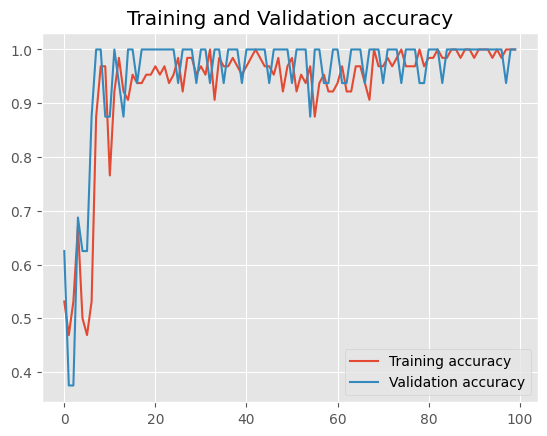

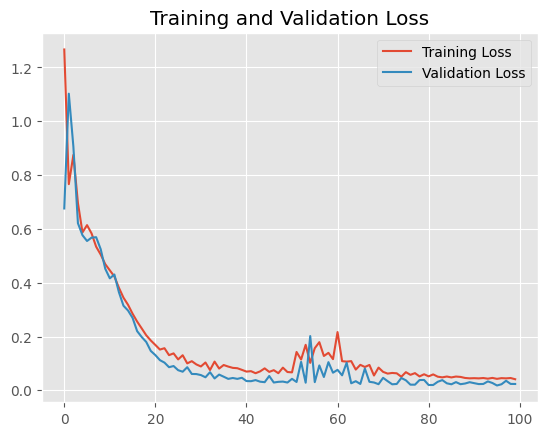

CPU times: total: 188 ms
Wall time: 2.8 s


In [6]:
%%time
X = X_train1
y = y_train1
Xv = X_val1
yv = y_val1
Xt = X_test1
yt = y_test1

print("X.shape:")
print(X.shape)
print("y.shape:")
print(y.shape)
print("Xv.shape:")
print(Xv.shape)
print("yv.shape:")
print(yv.shape)
print("Xt.shape:")
print(Xt.shape)
print("yt.shape:")
print(yt.shape)
print("\n")

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 100
n_input = X.shape[1]
n_hidden1 = 50
n_hidden2 = 100
n_samples = X.shape[0]
n_classes = 1

# モデルのインスタンス化
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_input,)),
    tf.keras.layers.Dense(n_hidden1, activation='relu'),
    tf.keras.layers.Dense(n_hidden2, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(n_classes)
    # tf.keras.layers.Dense(n_classes, activation='sigmoid')
])

# 各クラスに属する確率の推定用にモデルを拡張（ロジットをSigmoid関数 or Softmax関数に通す）
probability_model = tf.keras.Sequential([
          model,
          tf.keras.layers.Activation("sigmoid")
          # tf.keras.layers.Softmax()
])

# 最適化手法
optimizer=tf.keras.optimizers.Adam(learning_rate)    # Adam,

# 損失関数
# loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)   # カテゴリ交差エントロピー（多値分類／ラベルエンコーディング）
loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)  # バイナリ交差エントロピー（2値分類）
# loss=tf.nn.sigmoid_cross_entropy_with_logits,  # シグモイド交差エントロピー（2値分類）

# メトリクス
# metrics=[tf.keras.metrics.Accuracy()]   # 正解率（多値分類？）
# metrics=[tf.keras.metrics.BinaryAccuracy()]   # 正解率（2値分類）
metrics=["accuracy"]

# モデルのコンパイル
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics
              )

# モデルのサマリー
model.summary()

# # trainのミニバッチイテレータ
# get_mini_batch_train = GetMiniBatch(X, y, batch_size=batch_size, seed=0)

# 学習
history = model.fit(X, y, validation_data=(Xv, yv), epochs=num_epochs)

# 推定
y_pred_proba = probability_model.predict(Xt)[:, 0]    # モデルの最終出力がロジットの場合
# y_pred_proba = model.predict(Xt)[:, 0]    # モデルの最終出力がSigmoid or Softmaxの場合

# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba:")
print(y_pred_proba)
print("y_pred:")
print(y_pred)
print("y_true:")
# print(np.argmax(yt, axis=1))
print(yt)
print("\n")

# 評価
score = model.evaluate(Xt, yt, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

# 学習曲線
plot_training_curve(history=history, metrics_list=["accuracy"])

## 【問題4】Iris（多値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。



### ●Irisデータセットver2（目的変数：3値）

In [7]:
# データセットの読み込み
dataset_path =".\Sprint13\Iris.csv"
# dataset_path = "drive/My Drive/DIVE INTO CODE/Sprint/Sprint13/Iris.csv"
df2 = pd.read_csv(dataset_path)

# データフレームから条件抽出
# df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df2["Species"]
X = df2.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)

# # ラベルエンコーディング
# y[y=='Iris-versicolor'] = 0
# y[y=='Iris-virginica'] = 1
# y[y=='Iris-setosa'] = 2
# y = y.astype(np.float32)[:, np.newaxis]

# One Hotエンコーディング
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_one_hot = enc.fit_transform(y[:, np.newaxis])

# trainとtestに分割
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_one_hot, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.2, random_state=0)

display(df2)

np.set_printoptions(threshold=10)    #ndarrayの要素の表示数上限を設定

print("y:")
print(y)
print(y.shape)
print("y_one_hot:")
print(y_one_hot)
print(y_one_hot.shape)
print(y_one_hot.dtype)
print("y_train1:")
print(y_train1.shape)
print("y_test1:")
print(y_test1.shape)
print("y_val1:")
print(y_val1.shape)

d:\Users\hhs20\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


y:
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' ... 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']
(150,)
y_one_hot:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(150, 3)
float64
y_train1:
(64, 1)
y_test1:
(20, 1)
y_val1:
(16, 1)


### ●学習・推定・評価

X.shape:
(96, 4)
y.shape:
(96, 3)
Xv.shape:
(24, 4)
yv.shape:
(24, 3)
Xt.shape:
(30, 4)
yt.shape:
(30, 3)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                250       
                                                                 
 dense_4 (Dense)             (None, 100)               5100      
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 0s 43ms/step - loss: 5.1086 - accuracy: 0.4167 - val_loss: 1.0123 - val_accuracy: 0.6250
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - los

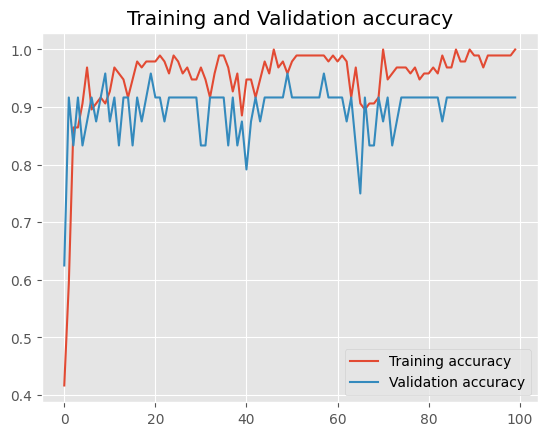

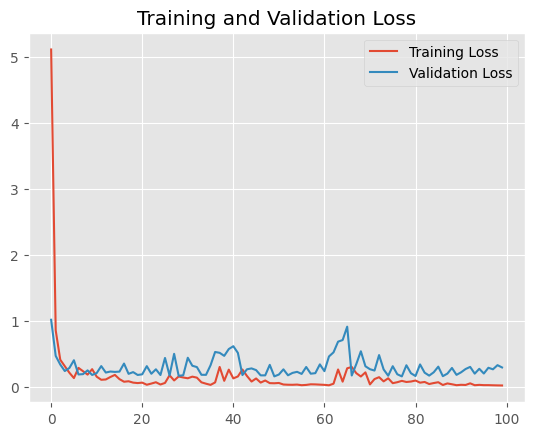

CPU times: total: 906 ms
Wall time: 2.7 s


In [8]:
%%time
X = X_train2
y = y_train2
Xv = X_val2
yv = y_val2
Xt = X_test2
yt = y_test2

print("X.shape:")
print(X.shape)
print("y.shape:")
print(y.shape)
print("Xv.shape:")
print(Xv.shape)
print("yv.shape:")
print(yv.shape)
print("Xt.shape:")
print(Xt.shape)
print("yt.shape:")
print(yt.shape)
print("\n")

# ハイパーパラメータの設定
learning_rate = 0.1
batch_size = 10
num_epochs = 100
n_input = X.shape[1]
n_hidden1 = 50
n_hidden2 = 100
n_samples = X.shape[0]
n_classes = 3

# モデルのインスタンス化
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_input,)),
    tf.keras.layers.Dense(n_hidden1, activation='relu'),
    tf.keras.layers.Dense(n_hidden2, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(n_classes)
    # tf.keras.layers.Dense(n_classes, activation='sigmoid')
])

# 各クラスに属する確率の推定用にモデルを拡張（ロジットをSigmoid関数 or Softmax関数に通す）
probability_model = tf.keras.Sequential([
          model,
          # tf.keras.layers.Activation("sigmoid")
          tf.keras.layers.Softmax()
])

# 最適化手法
optimizer=tf.keras.optimizers.Adam(learning_rate)    # Adam,

# 損失関数
# loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),   # カテゴリ交差エントロピー（多値分類／ラベルエンコーディング）
loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True)   # カテゴリ交差エントロピー（多値分類／OneHotエンコーディング）
# loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)  # バイナリ交差エントロピー（2値分類）
# loss=tf.nn.sigmoid_cross_entropy_with_logits,  # シグモイド交差エントロピー（2値分類）

# メトリクス
# metrics=[tf.keras.metrics.BinaryAccuracy()]   # 正解率（2値分類）
metrics=["accuracy"]  # 正解率（多値分類？）

# モデルのコンパイル
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics
              )

# モデルのサマリー
model.summary()

# # trainのミニバッチイテレータ
# get_mini_batch_train = GetMiniBatch(X, y, batch_size=batch_size, seed=0)

# 学習
history = model.fit(X, y, validation_data=(Xv, yv), epochs=num_epochs)

# 推定
# y_pred_proba = probability_model.predict(Xt)[:, 0]    # 二値分類
y_pred_proba = probability_model.predict(Xt)    # 多値分類

# 確率を0, 1に変換
# y_pred = np.where(y_pred_proba >0.5, 1, 0)    # 二値分類
y_pred = np.argmax(y_pred_proba, axis=1)    # 多値分類
print("y_pred_proba:")
print(y_pred_proba)
print("y_pred:")
print(y_pred)
print("y_true:")
print(np.argmax(yt, axis=1))
print("\n")

# 評価
score = model.evaluate(Xt, yt, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

# 学習曲線
plot_training_curve(history=history, metrics_list=["accuracy"])

## 【問題5】House PricesをKerasで学習
TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換えてください。

### ●住宅価格データセット

In [9]:
# csv_path = "drive/My Drive/DIVE INTO CODE/Week3/train.csv" # ファイル名（パス）を指定する
csv_path = "../Week3/DIC_Week3_HousingInfoAnalysis/train.csv" # ファイル名（パス）を指定する

import pandas as pd
df_train_org = pd.read_csv(csv_path, encoding="shift_jis")

# df_train = df_train_org.iloc[:10000, :]   #データ数を削減
df_train = df_train_org

#GrLivArea、YearBuilt、SalePrice列のみを抽出
df_train = df_train.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]

pd.set_option('display.max_rows', 150)    #最大表示行数を設定
pd.set_option('display.max_columns', 5)   #最大表示列数を設定

display(df_train)

,GrLivArea,YearBuilt,SalePrice
0,1710.0,2003.0,208500.0
1,1262.0,1976.0,181500.0
2,1786.0,2001.0,223500.0
3,1717.0,1915.0,140000.0
4,2198.0,2000.0,250000.0
...,...,...,...
1457,2340.0,1941.0,266500.0
1458,1078.0,1950.0,142125.0
1459,1256.0,1965.0,147500.0
1460,NaN,NaN,NaN


,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.199010,0.708624
YearBuilt,0.199010,1.000000,0.522897
SalePrice,0.708624,0.522897,1.000000


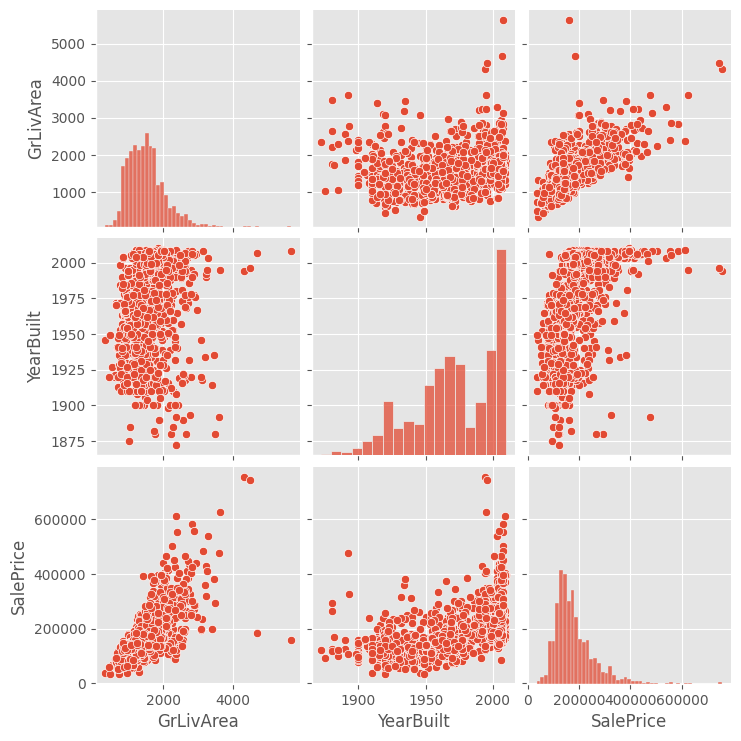

In [10]:
#相関係数
display(df_train.corr())

#散布図行列を作成
sns.pairplot(df_train, diag_kind="hist");

In [11]:
X = np.array(df_train.iloc[:, :-1])
y = np.array(df_train.iloc[:, -1])

# 標準化
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

#データセットを学習用と検証用に分割
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_transformed, y, train_size = 0.8, random_state=0)
# さらにtrainとvalに分割
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, train_size=0.8, random_state=0)

### ●学習・推定・評価

X.shape:
(935, 2)
y.shape:
(935,)
Xv.shape:
(234, 2)
yv.shape:
(234,)
Xt.shape:
(293, 2)
yt.shape:
(293,)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                150       
                                                                 
 dense_7 (Dense)             (None, 100)               5100      
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,351
Trainable params: 5,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
30/30 [==============================] - 0s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 2/10
30/30 [==============================] - 0s 1ms/step - loss: nan - mse: nan - v

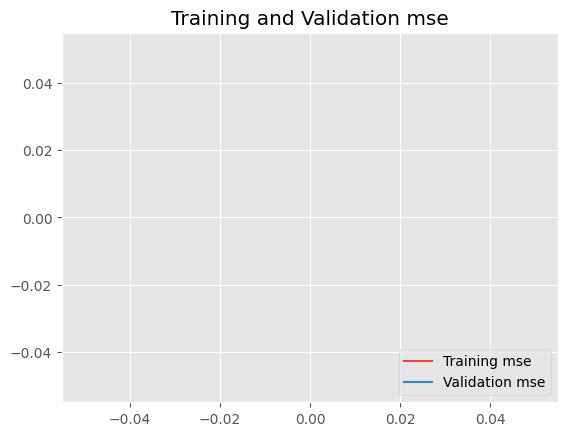

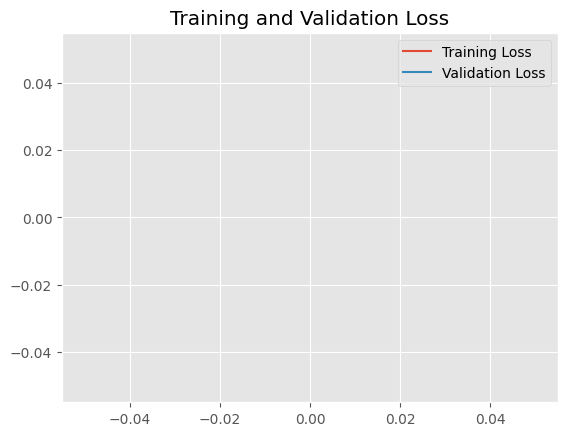

CPU times: total: 281 ms
Wall time: 1.02 s


In [12]:
%%time
X = X_train3
y = y_train3
Xv = X_val3
yv = y_val3
Xt = X_test3
yt = y_test3

print("X.shape:")
print(X.shape)
print("y.shape:")
print(y.shape)
print("Xv.shape:")
print(Xv.shape)
print("yv.shape:")
print(yv.shape)
print("Xt.shape:")
print(Xt.shape)
print("yt.shape:")
print(yt.shape)
print("\n")

# ハイパーパラメータの設定
learning_rate = 0.1
batch_size = 10
num_epochs = 10
n_input = X.shape[1]
n_hidden1 = 50
n_hidden2 = 100
n_samples = X.shape[0]
n_classes = 1

# モデルのインスタンス化
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_input,)),
    tf.keras.layers.Dense(n_hidden1, activation='relu'),
    tf.keras.layers.Dense(n_hidden2, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(n_classes)
    # tf.keras.layers.Dense(n_classes, activation='sigmoid')
])

# 各クラスに属する確率の推定用にモデルを拡張（ロジットをSigmoid関数 or Softmax関数に通す）
probability_model = tf.keras.Sequential([
          model,
          # tf.keras.layers.Activation("sigmoid")
          tf.keras.layers.Softmax()
])

# 最適化手法
optimizer = tf.keras.optimizers.Adam(learning_rate)    # Adam,

# 損失関数
# loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)  # バイナリ交差エントロピー（2値分類）
# loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)   # カテゴリ交差エントロピー（多値分類／OneHotエンコーディング）
loss = tf.keras.losses.MeanSquaredError() # MSE

# メトリクス
# metrics = [tf.keras.metrics.BinaryAccuracy()]   # 正解率（2値分類）
# metrics = ["accuracy"]  # 正解率
metrics = ["mse"]  # MSE

# モデルのコンパイル
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics
              )

# モデルのサマリー
model.summary()

# 学習
history = model.fit(X, y, validation_data=(Xv, yv), epochs=num_epochs)

# 推定
# y_pred_proba = probability_model.predict(Xt)[:, 0]    # 二値分類
y_pred_proba = probability_model.predict(Xt)    # 多値分類

# # 確率をラベルに変換
# # y_pred = np.where(y_pred_proba >0.5, 1, 0)    # 二値分類
# y_pred = np.argmax(y_pred_proba, axis=1)    # 多値分類
# print("y_pred_proba:")
# print(y_pred_proba)
# print("y_pred:")
# print(y_pred)
# print("y_true:")
# print(np.argmax(yt, axis=1))
# print("\n")

# 評価
score_list = model.evaluate(Xt, yt, verbose=0)
print('Train loss: {}'.format(score_list[0]))
for score, metrics_name in zip(score_list[1:], metrics):
    print(('Train {}: {}').format(metrics_name, score))

# 学習曲線
plot_training_curve(history=history, metrics_list=metrics)

## 【問題6】MNISTをKerasで学習
TensorFlowによるMNISTデータセットによる画像の多値分類をKerasに書き換えてください

### ●MNISTのデータセット

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

# # 各画像のピクセルデータを平滑化（28x28 ⇒ 784x1）
# X_train = X_train.reshape(-1, 784)
# X_test = X_test.reshape(-1, 784)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


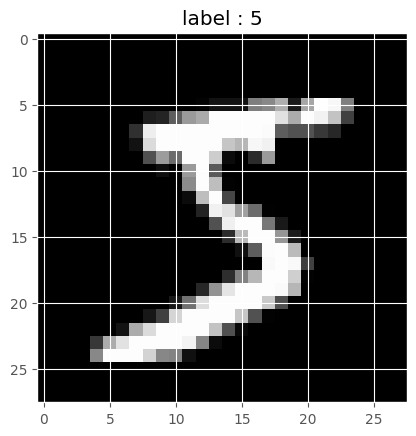

In [14]:
## 画像を可視化 ##
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

C:\Users\hhs20\AppData\Local\Temp\ipykernel_36920\1783041983.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image = image.astype(np.float) # float型に変換


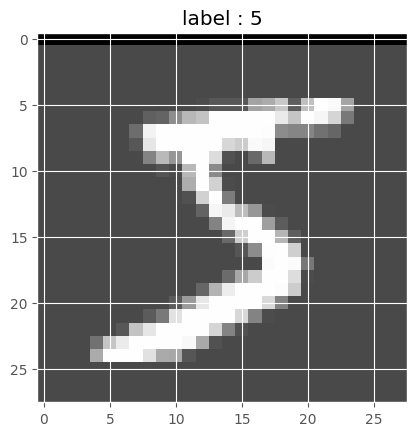

[[-105.35 -105.35 -105.35 ... -105.35 -105.35 -105.35]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 ...
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]]


In [15]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
# image -= 105.35 # 意図的に負の小数値を作り出してみる
image[0] = -105.35 # 意図的に負の小数値を作り出してみる

# 自動スケーリングあり
plt.imshow(image, 'gray')   # 最小値が0となるように自動的にスケーリングされる
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image[:10]) # 値を確認

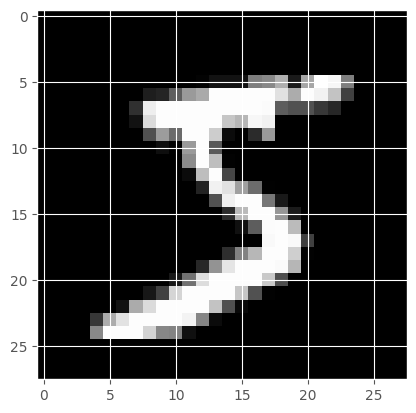

In [16]:
# 自動スケーリング無し
plt.imshow(image, 'gray', vmin = 0, vmax = 255);   # 範囲外の値は0 or 255に置換される (自動スケールされない)

In [17]:
## 画像データを正規化 ##
X_train_transformed = X_train.astype(np.float) / 255
X_test_transformed = X_test.astype(np.float) / 255

C:\Users\hhs20\AppData\Local\Temp\ipykernel_36920\917852886.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_transformed = X_train.astype(np.float) / 255
C:\Users\hhs20\AppData\Local\Temp\ipykernel_36920\917852886.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_transformed = X_test.astype(np.float) / 255


In [18]:
## One Hot Encoding ##
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64
print(y_train)
print(y_train_one_hot)

(60000,)
(60000, 10)
float64
[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


d:\Users\hhs20\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train_transformed, y_train_one_hot, train_size=0.99, random_state=0)
X_test4 = X_test_transformed
y_test4 = y_test_one_hot
# X_train4 = X_train4[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
# X_test4 = X_test4[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
# X_test4 = X_val4[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
print(X_train4.shape)
print(X_test4.shape)
print(X_val4.shape)
print(y_train4.shape)
print(y_test4.shape)
print(y_val4.shape)

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_transformed[:6000, :], y_train[:6000], train_size=0.8, random_state=0)
# X_train2 = X_train2[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
# X_test2 = X_test2[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
# print(X_train2.shape) # (4800, 784)
# print(X_test2.shape) # (1200, 784)
# print(y_train2.shape) # (4800,)
# print(y_test2.shape) # (1200,)


(59400, 28, 28)
(10000, 28, 28)
(600, 28, 28)
(59400, 10)
(10000, 10)
(600, 10)


### ●学習・推定・評価

X.shape:
(59400, 28, 28)
y.shape:
(59400, 10)
Xv.shape:
(600, 28, 28)
yv.shape:
(600, 10)
Xt.shape:
(10000, 28, 28)
yt.shape:
(10000, 10)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 400)               314000    
                                                                 
 dense_13 (Dense)            (None, 200)               80200     
                                                                 
 dense_14 (Dense)            (None, 10)                2010      
                                                                 
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1857/1857 [==================

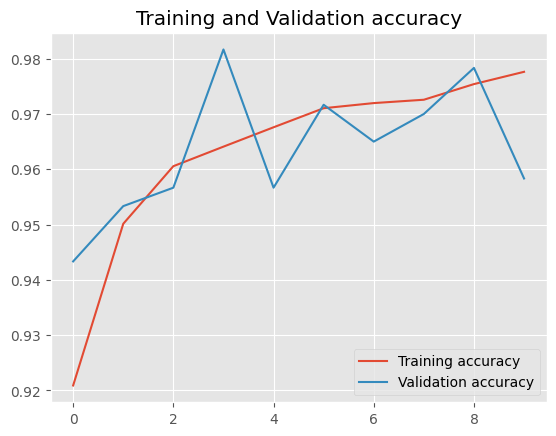

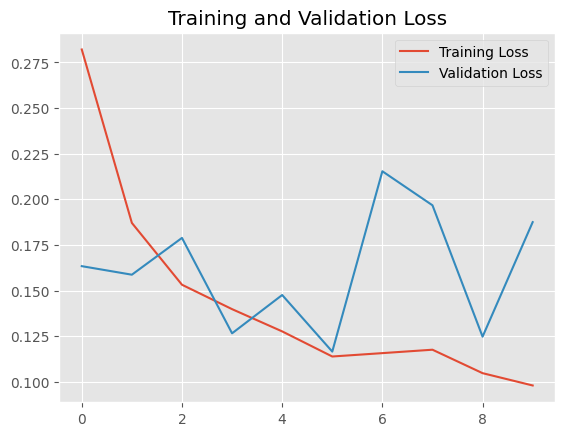

CPU times: total: 53.9 s
Wall time: 1min 27s


In [21]:
%%time
X = X_train4
y = y_train4
Xv = X_val4
yv = y_val4
Xt = X_test4
yt = y_test4

print("X.shape:")
print(X.shape)
print("y.shape:")
print(y.shape)
print("Xv.shape:")
print(Xv.shape)
print("yv.shape:")
print(yv.shape)
print("Xt.shape:")
print(Xt.shape)
print("yt.shape:")
print(yt.shape)
print("\n")

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 20
num_epochs = 10
input_shape = X.shape[-2:]
n_hidden1 = 400
n_hidden2 = 200
n_samples = X.shape[0]
n_classes = 10

# モデルのインスタンス化
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_hidden1, activation='relu'),
    tf.keras.layers.Dense(n_hidden2, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(n_classes)
    # tf.keras.layers.Dense(n_classes, activation='sigmoid')
])

# 各クラスに属する確率の推定用にモデルを拡張（ロジットをSigmoid関数 or Softmax関数に通す）
probability_model = tf.keras.Sequential([
          model,
          # tf.keras.layers.Activation("sigmoid")
          tf.keras.layers.Softmax()
])

# 最適化手法
optimizer = tf.keras.optimizers.Adam(learning_rate)    # Adam,

# 損失関数
# loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)  # バイナリ交差エントロピー（2値分類）
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)   # カテゴリ交差エントロピー（多値分類／OneHotエンコーディング）
# loss = tf.keras.losses.MeanSquaredError() # MSE

# メトリクス
# metrics = [tf.keras.metrics.BinaryAccuracy()]   # 正解率（2値分類）
metrics = ["accuracy"]  # 正解率
# metrics = ["mse"]  # MSE

# モデルのコンパイル
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics
              )

# モデルのサマリー
model.summary()

# 学習
history = model.fit(X, y, validation_data=(Xv, yv), epochs=num_epochs, verbose=True)

# 推定
# y_pred_proba = probability_model.predict(Xt)[:, 0]    # 二値分類
y_pred_proba = probability_model.predict(Xt)    # 多値分類

# # 確率をラベルに変換
# y_pred = np.where(y_pred_proba >0.5, 1, 0)    # 二値分類
y_pred = np.argmax(y_pred_proba, axis=1)    # 多値分類
print("y_pred_proba:")
print(y_pred_proba)
print("y_pred:")
print(y_pred)
print("y_true:")
print(np.argmax(yt, axis=1))
print("\n")

# 評価
score_list = model.evaluate(Xt, yt, verbose=0)
print('Train loss: {}'.format(score_list[0]))
for score, metrics_name in zip(score_list[1:], metrics):
    print(('Train {}: {}').format(metrics_name, score))

# 学習曲線
plot_training_curve(history=history, metrics_list=metrics)